In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load Data

In [403]:
df_train = pd.read_csv('../Data/data_train.csv',index_col=0)
df_test = pd.read_csv('../Data/data_test.csv',index_col=0)

In [404]:
df_train.head(5) #first five column of data

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07


In [405]:
df_train.describe() #Summary of data

,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
count,256769.000000,256769.000000,270778.000000,8.142620e+05,8.142620e+05,8.142620e+05,8.142620e+05
mean,2.680249,2.279469,2.454799,3.760411e+06,-1.922153e+07,3.760426e+06,-1.922181e+07
std,7.591053,7.118452,7.160578,8.974393e+03,7.632234e+04,8.904451e+03,7.515560e+04
min,-1.000000,-1.000000,-1.000000,3.741027e+06,-1.938291e+07,3.740998e+06,-1.937688e+07
25%,0.000000,-1.000000,0.000000,3.755174e+06,-1.927454e+07,3.755359e+06,-1.927308e+07
50%,0.000000,0.000000,0.000000,3.760071e+06,-1.923020e+07,3.760076e+06,-1.923031e+07
75%,0.500000,0.220000,0.440000,3.767509e+06,-1.916999e+07,3.767455e+06,-1.917193e+07
max,162.000000,162.000000,162.000000,3.777099e+06,-1.904266e+07,3.777055e+06,-1.904666e+07


In [406]:
#Change time format
df_train['time_entry']=pd.to_timedelta(df_train['time_entry'])
df_train['time_exit']=pd.to_timedelta(df_train['time_exit'])

In [407]:
#Create a set of booleans
mask_time = (df_train['time_entry']<'16:00:00') & (df_train['time_entry']>'15:00:00')|\
                (df_train['time_exit']<'16:00:00') & (df_train['time_exit']>'15:00:00')
mask_location = ((df_train['x_entry']<=3770901.5068) & (df_train['x_entry']>=3750901.5068)\
                & (-df_train['y_entry']>= 19208905.6133) & (-df_train['y_entry']<=19268905.6133))\
                 |((df_train['x_exit']<=3770901.5068) & (df_train['x_exit']>=3750901.5068)\
                & (-df_train['y_exit']>=19208905.6133) & (-df_train['y_exit']<=19268905.6133))
mask_target = ((df_train['x_exit']<=3770901.5068) & (df_train['x_exit']>=3750901.5068)\
                & (-df_train['y_exit']>=19208905.6133) & (-df_train['y_exit']<=19268905.6133))

In [408]:
df_train.loc[mask_time].loc[mask_location].head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
41,00036bcd1b1edb767ef5bce13ef339b0_19,traj_00036bcd1b1edb767ef5bce13ef339b0_19_5,15:33:43,15:33:43,NaN,NaN,NaN,3.757445e+06,-1.923890e+07,3.757445e+06,-1.923890e+07
67,00068f505957087127de6d86106d7ae0_31,traj_00068f505957087127de6d86106d7ae0_31_10,15:05:12,15:12:07,NaN,NaN,NaN,3.767048e+06,-1.922221e+07,3.767658e+06,-1.920582e+07
84,00096d707db5b8997b56d7df5dfd6674_1,traj_00096d707db5b8997b56d7df5dfd6674_1_4,15:15:53,15:15:53,NaN,NaN,NaN,3.763762e+06,-1.924162e+07,3.763762e+06,-1.924162e+07
90,000a33463e3993759a6e026b26a20831_19,traj_000a33463e3993759a6e026b26a20831_19_10,15:56:06,15:56:06,-1.0,-1.0,-1.0,3.762306e+06,-1.923490e+07,3.762306e+06,-1.923490e+07
107,000ae674e3e7782151745567f5daeb40_5,traj_000ae674e3e7782151745567f5daeb40_5_12,15:06:28,15:06:28,NaN,NaN,NaN,3.760290e+06,-1.925370e+07,3.760290e+06,-1.925370e+07


In [409]:
df_train['location']=np.where(mask_location, 1,0)
df_train['target']=np.where(mask_target, 1,0)

In [412]:
train = df_train.loc[mask_time][['hash','target']].groupby('hash').sum().sort_values(by='target')
train.head()

,target
hash,
0000a8602cf2def930488dee7cdad104_1,0
9cbb4b8c612d34367a4ecd2d5b2413ac_31,0
9cba085f906243adf4c9b5bc7385e518_11,0
9cba04135b7c1a1b045ab427860ed2cf_1,0
9cb99616be216ea2adf4111c5e7ede51_5,0


In [414]:
print(len(df_train.loc[mask_location].loc[mask_time])/len(df_train.loc[mask_time])) # percentage of 
print(len(df_train.loc[mask_location])/len(df_train)) #percent of records that are in city center
print(train['target'].sum()/len(train)) # percentage of ID that is at city hall during that time

0.3162971257932064
0.32804429041266814
0.2713400522583053


In [434]:
def add_dummy(df_test):
    df_test['time_entry']=pd.to_timedelta(df_test['time_entry'])
    df_test['time_exit']=pd.to_timedelta(df_test['time_exit'])
    
    mask_time = (df_test['time_entry']<'16:00:00') & (df_test['time_entry']>'15:00:00')|\
                    (df_test['time_exit']<'16:00:00') & (df_test['time_exit']>'15:00:00')
    mask_location = ((df_test['x_entry']<=3770901.5068) & (df_test['x_entry']>=3750901.5068)\
                    & (-df_test['y_entry']>= 19208905.6133) & (-df_test['y_entry']<=19268905.6133))\
                     |((df_test['x_exit']<=3770901.5068) & (df_test['x_exit']>=3750901.5068)\
                    & (-df_test['y_exit']>=19208905.6133) & (-df_test['y_exit']<=19268905.6133))
    mask_target = ((df_test['x_exit']<=3770901.5068) & (df_test['x_exit']>=3750901.5068)\
                    & (-df_test['y_exit']>=19208905.6133) & (-df_test['y_exit']<=19268905.6133))
    
    df_test['location']=np.where(mask_location, 1,0)
    df_test['target']=np.where(mask_target, 1,0)
    test = df_test.loc[mask_time][['hash','target']].groupby('hash').sum().sort_values(by='target')
    
    return df_test, test

In [431]:
df_test, test = add_dummy_test(df_test)

In [432]:
df_test.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,location,target
0,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_0,11:43:17,11:50:17,NaN,NaN,NaN,3.773413e+06,-1.909828e+07,3.773111e+06,-1.914508e+07,0,0
1,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_2,12:21:37,12:21:37,0.0,0.0,0.0,3.773199e+06,-1.914354e+07,3.773199e+06,-1.914354e+07,0,0
2,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_3,12:34:27,13:14:11,NaN,NaN,NaN,3.763760e+06,-1.921342e+07,3.771757e+06,-1.911092e+07,1,0
3,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_4,13:25:33,13:43:13,NaN,NaN,NaN,3.773385e+06,-1.911344e+07,3.773131e+06,-1.914465e+07,0,0
4,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_5,15:03:32,15:10:32,NaN,NaN,NaN,3.773118e+06,-1.914490e+07,NaN,NaN,0,0


# Feature Engineering

Let's choose features that have some predictive power:

1. We can bucket the location: nearby, in city center, far away
2. we can bucket time: close to 3 pm
3. Find the line connecting trajectory point before 3 and after 4. See if it go through target area.
4. The slope of last record before 3 and the slop of first record after 4.
5. Velocity is 2 times greater than distance between two records divided by time interval.

In [433]:
def feature_generator(df_test,test):
    mask_before = (df_test['time_exit']<'15:00:00')
    mask_after = (df_test['time_exit']>'15:00:00')
    
    entry_before = df_test[mask_before][['hash','location']].groupby('hash').sum()
    entry_before.columns = ['num_visit']

    records = df_test[mask_before][['hash','time_entry','time_exit','x_entry','y_entry','x_exit','y_exit']]
    
    last_entry = df_test[mask_before][['hash','time_exit']].groupby('hash').max()
    last_entry = pd.merge(last_entry.reset_index(),records, on =['hash','time_exit'],how = 'left')
    
    mask_loc_x_entry = (last_entry['x_entry']<=3770901.5068) & (last_entry['x_entry']>=3750901.5068)
    mask_loc_y_entry = (-last_entry['y_entry']>= 19208905.6133) & (-last_entry['y_entry']<=19268905.6133)
    mask_loc_x_exit = (last_entry['x_exit']<=3770901.5068) & (last_entry['x_exit']>=3750901.5068)
    mask_loc_y_exit = (-last_entry['y_exit']>=19208905.6133) & (-last_entry['y_exit']<=19268905.6133)
    
    last_entry['hour'] =last_entry['time_exit'].dt.components.hours
    last_entry=last_entry.drop(['time_entry','time_exit'],1)
    last_entry=add_distance(last_entry,'x_entry','x')
    last_entry=add_distance(last_entry,'y_entry','y')
    last_entry=add_distance(last_entry,'x_exit','x')
    last_entry=add_distance(last_entry,'y_exit','y')
    last_entry=last_entry.drop(['x_entry','y_entry','x_exit','y_exit'],1)
    last_entry=last_entry.set_index('hash')
    
    feature_table = entry_before.join(last_entry, how='outer').join(test, how='right')
    
    feature_table.loc[feature_table['num_visit'].isnull(),'num_visit']=0
    feature_table.loc[feature_table['hour'].isnull(),'hour']=0
    for col in list(feature_table.columns[2:-1]):
        feature_table.loc[feature_table[col].isnull(),col]=feature_table[col].max()
    feature_table.loc[feature_table.isnull().any(axis=1)]
    
    return feature_table

In [415]:
mask_before = (df_train['time_exit']<'15:00:00')
mask_after = (df_train['time_exit']>'15:00:00')

In [416]:
#number of entries before 3 
entry_before = df_train[mask_before][['hash','location']].groupby('hash').sum()
entry_before.columns = ['num_visit']
entry_before.sort_values(by='num_visit').head()

,num_visit
hash,
0000a8602cf2def930488dee7cdad104_1,0
922796aeb340464c5f3f3ab08c1e6519_1,0
9224cd545e1f454c5e35cf98d3cd4c62_11,0
922479ac0f8ccd3a2a731eb5117f0a1a_9,0
92243e5562947f21a97250f15be09d04_11,0


In [417]:
records = df_train[mask_before][['hash','time_entry','time_exit','x_entry','y_entry','x_exit','y_exit']]
records.head()

,hash,time_entry,time_exit,x_entry,y_entry,x_exit,y_exit
0,0000a8602cf2def930488dee7cdad104_1,07:04:31,07:08:32,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,0000a8602cf2def930488dee7cdad104_1,07:20:34,07:25:42,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,0000a8602cf2def930488dee7cdad104_1,07:53:32,08:03:25,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,0000a8602cf2def930488dee7cdad104_1,08:17:50,08:37:23,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,0000a8602cf2def930488dee7cdad104_1,14:38:09,14:38:09,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07


In [418]:
last_entry.reset_index().head()

,hash,hour,distance_x_entry,distance_y_entry,distance_x_exit,distance_y_exit
0,0000a8602cf2def930488dee7cdad104_1,14,5992.498269,16679.383523,5992.498269,16679.383523
1,0000cf177130469eeac79f67b6bcf3df_9,14,1859.205576,0.000000,1859.205576,0.000000
2,0001f97b99a80f18f62e2d44e54ef33d_3,11,559.426675,104771.303168,0.000000,28072.470057
3,0002124248b0ca510dea42824723ccac_31,14,0.000000,0.000000,0.000000,6792.851529
4,000219c2a6380c307e8bffd85b5e404b_23,11,3260.717965,0.000000,0.000000,1046.889022


In [419]:
last_entry = df_train[mask_before][['hash','time_exit']].groupby('hash').max()
last_entry = pd.merge(last_entry.reset_index(),records, on =['hash','time_exit'],how = 'left')

In [420]:
mask_loc_x_entry = (last_entry['x_entry']<=3770901.5068) & (last_entry['x_entry']>=3750901.5068)
mask_loc_y_entry = (-last_entry['y_entry']>= 19208905.6133) & (-last_entry['y_entry']<=19268905.6133)
mask_loc_x_exit = (last_entry['x_exit']<=3770901.5068) & (last_entry['x_exit']>=3750901.5068)
mask_loc_y_exit = (-last_entry['y_exit']>=19208905.6133) & (-last_entry['y_exit']<=19268905.6133)

In [421]:
def add_distance(df,col,axis):
    if 'x' in axis:
        ran = [3770901.5068,3750901.5068]
        mask = mask_loc_x_entry if 'entry' in col else mask_loc_x_exit
    elif 'y' in axis:
        ran = [-19208905.6133,-19268905.6133]
        mask = mask_loc_y_entry if 'entry' in col else mask_loc_y_exit
        
    df['col_1']=(df[col]-ran[0]).abs()
    df['col_2']=(df[col]-ran[1]).abs()
    df['distance_'+col]=df[['col_1','col_2']].min(axis=1)
    
    df.loc[mask,'distance_'+col]=0
    df = df.drop(['col_1','col_2'],1)
    return df

In [422]:
last_entry['hour'] =last_entry['time_exit'].dt.components.hours
last_entry=last_entry.drop(['time_entry','time_exit'],1)
last_entry=add_distance(last_entry,'x_entry','x')
last_entry=add_distance(last_entry,'y_entry','y')
last_entry=add_distance(last_entry,'x_exit','x')
last_entry=add_distance(last_entry,'y_exit','y')
last_entry=last_entry.drop(['x_entry','y_entry','x_exit','y_exit'],1)
last_entry=last_entry.set_index('hash')
last_entry.head(10)

,hour,distance_x_entry,distance_y_entry,distance_x_exit,distance_y_exit
hash,,,,,
0000a8602cf2def930488dee7cdad104_1,14,5992.498269,16679.383523,5992.498269,16679.383523
0000cf177130469eeac79f67b6bcf3df_9,14,1859.205576,0.000000,1859.205576,0.000000
0001f97b99a80f18f62e2d44e54ef33d_3,11,559.426675,104771.303168,0.000000,28072.470057
0002124248b0ca510dea42824723ccac_31,14,0.000000,0.000000,0.000000,6792.851529
000219c2a6380c307e8bffd85b5e404b_23,11,3260.717965,0.000000,0.000000,1046.889022
0002974025ed311b78ad49904a31d4ea_25,14,3878.541139,33488.989123,1991.675770,27693.140289
0002e7384d78cd2c2395f63e4b369f40_23,13,0.000000,40411.526495,4581.399877,31357.715547
00036bcd1b1edb767ef5bce13ef339b0_19,9,0.000000,0.000000,0.000000,0.000000
00037fa9d812de1961f1e2603ad4b22b_25,13,0.000000,54468.612187,0.000000,52208.503462


In [423]:
feature_table = entry_before.join(last_entry, how='outer').join(train, how='right')
feature_table.head(5)

,num_visit,hour,distance_x_entry,distance_y_entry,distance_x_exit,distance_y_exit,target
hash,,,,,,,
0000a8602cf2def930488dee7cdad104_1,0.0,14.0,5992.498269,16679.383523,5992.498269,16679.383523,0
9cbb4b8c612d34367a4ecd2d5b2413ac_31,0.0,14.0,7707.931622,0.000000,0.000000,84868.221423,0
9cba085f906243adf4c9b5bc7385e518_11,0.0,14.0,5821.066253,0.000000,5821.066253,0.000000,0
9cba04135b7c1a1b045ab427860ed2cf_1,0.0,13.0,0.000000,38642.359755,0.000000,38642.359755,0
9cb99616be216ea2adf4111c5e7ede51_5,0.0,13.0,0.000000,12826.915693,0.000000,6419.073497,0


In [424]:
feature_table.describe()

,num_visit,hour,distance_x_entry,distance_y_entry,distance_x_exit,distance_y_exit,target
count,132643.000000,132643.000000,132643.000000,132643.000000,132643.000000,132643.000000,133950.000000
mean,1.692799,12.527536,1302.595790,36740.813800,1321.359490,36798.906806,0.271340
std,2.760132,2.300206,2286.095286,42285.327197,2302.003249,42276.052075,0.444653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,19137.922613,0.000000,19364.008261,0.000000
75%,3.000000,14.000000,1852.959158,65005.261754,1957.042882,65101.774393,1.000000
max,19.000000,14.000000,9868.642939,162248.332069,9870.869329,162248.332069,1.000000


In [425]:
feature_table.loc[feature_table['num_visit'].isnull(),'num_visit']=0
feature_table.loc[feature_table['hour'].isnull(),'hour']=0
for col in list(feature_table.columns[2:-1]):
    feature_table.loc[feature_table[col].isnull(),col]=feature_table[col].max()
feature_table.loc[feature_table.isnull().any(axis=1)]

,num_visit,hour,distance_x_entry,distance_y_entry,distance_x_exit,distance_y_exit,target
hash,,,,,,,


In [427]:
feature_table[feature_table.isnull().any(axis=1)]['target'].sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a96c7828>,
      dtype=object)

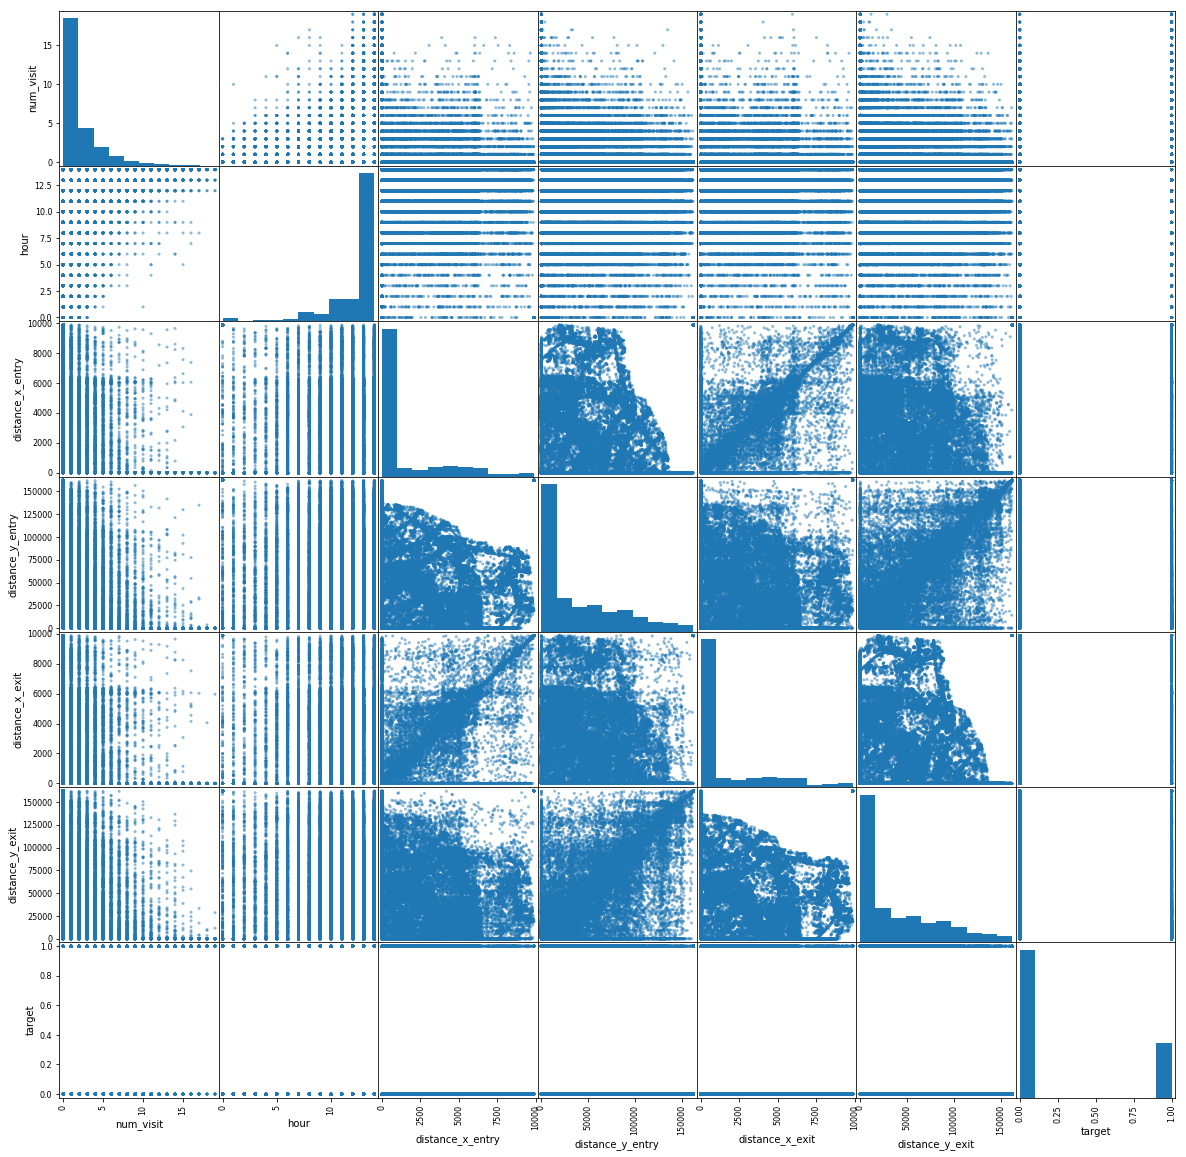

In [428]:
scatter_matrix(feature_table,figsize=(20,20))

In [435]:
X = feature_table.drop('target',1)
y = feature_table['target']

# Modeling

In [436]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [437]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [444]:
prediction=[1 if y_pred>0.5 else 0 for y_pred in gbrt.predict(X_val)]

In [440]:
errors = [roc_curve(y_val, y_pred,1)
          for y_pred in gbrt.staged_predict(X_val)]

In [445]:
f1_score(y_val,prediction)

0.7629920835801606

In [446]:
def plotUnivariateROC(error):
    fpr, tpr, thresholds = error
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c,label= ' (AUC = %0.3f)'% roc_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend()
    
    return roc_auc

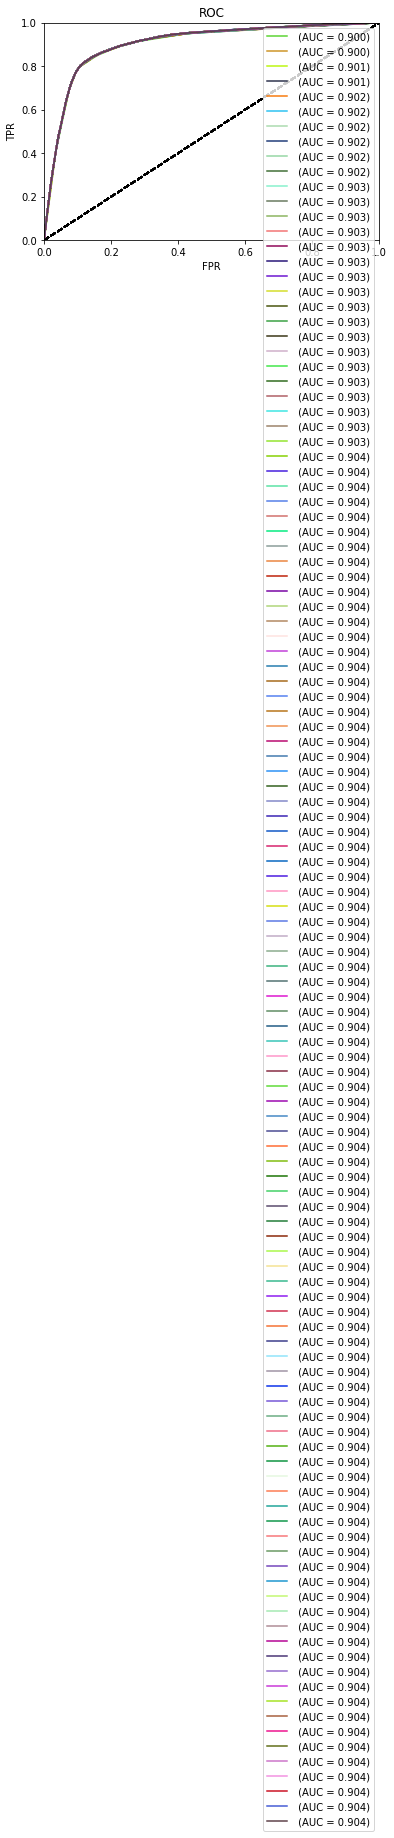

In [447]:
auc_dict = {}
for i in range(len(errors)):
    auc_dict[i] = plotUnivariateROC(errors[i])

In [355]:
bst_n_estimators = np.argmin(errors)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()